### Importing necessary libraries

In [2]:
# import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_extraction.text import CountVectorizer as CV, TfidfVectorizer as TV
from sklearn.model_selection import train_test_split as TTS
import re
import string
import nltk
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
import spacy
from textstat.textstat import textstatistics
from textblob import TextBlob
from sklearn.metrics import confusion_matrix, classification_report

### Preparing data

In [3]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Displaying null value percentage distribution

In [3]:
df['Unnamed: 2'].isna().value_counts(normalize=True)

True     0.991027
False    0.008973
Name: Unnamed: 2, dtype: float64

In [4]:
df['Unnamed: 3'].isna().value_counts(normalize=True)

True     0.997846
False    0.002154
Name: Unnamed: 3, dtype: float64

In [5]:
df['Unnamed: 4'].isna().value_counts(normalize=True)

True     0.998923
False    0.001077
Name: Unnamed: 4, dtype: float64

### Deleting unnecessary columns

In [6]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Frequence table of Target variable

In [8]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

### Percentage distribution on Target variable

In [9]:
df.v1.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

### Count plot on target variable

C:\Users\Karan Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='count'>

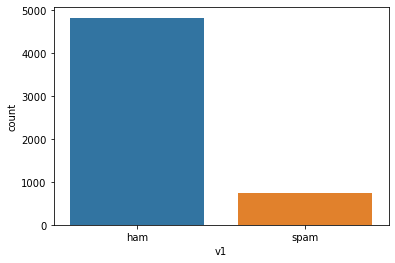

In [10]:
sns.countplot(df['v1'])

In [11]:
pd.set_option('display.max_colwidth',-1)
df

C:\Users\KARANC~1\AppData\Local\Temp/ipykernel_43700/805102761.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


### Rearanging dataframe columns

In [12]:
df = df[['v2','v1']]
df

,v2,v1
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


### Preprocessing on the feature variable

In [13]:
def clean_s(data):
    pd.set_option('display.max_colwidth', -1)

    #defining the function to remove punctuation
    def remove_punctuation(text):
        punctuationfree="".join([i for i in text if i not in string.punctuation])
        return punctuationfree
    #storing the puntuation free text
    data = remove_punctuation(data)
    
    #lower
    data = data.lower()
    
    #defining function for tokenization
    def tokenization(text):
        tokens = re.split('W+',text)
        return tokens
      
    data = tokenization(data)
    def remove_stopwords(text):
        output= [i for i in text if i not in stopwords]
        return output
    #applying the function
    data = remove_stopwords(data)    
    
    ##Steaming 
    #defining a function for stemming
    def stemming(text):
        stem_text = [porter_stemmer.stem(word) for word in text]
        return stem_text
    data = stemming(data)
    def to_str(x):
        x =''.join(x)
        return x
    data = to_str(data)
    
    def remove_numbers(input_str):
        result = re.sub(r'\d+', '', input_str)
        return result
    data = remove_numbers(data)        
    return data

In [14]:
df['v2'] = df['v2'].apply(clean_s)
df

C:\Users\KARANC~1\AppData\Local\Temp/ipykernel_43700/3031690834.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,v2,v1
0,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply over,spam
3,u dun say so early hor u c already then say,ham
4,nah i dont think he goes to usf he lives around here though,ham
...,...,...
5567,this is the nd time we have tried contact u u have won the å£ pound prize claim is easy call now only p per minute btnationalr,spam
5568,will ì b going to esplanade fr hom,ham
5569,pity was in mood for that soany other suggest,ham
5570,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for fre,ham


### Defining features and labels as x and y variables 

In [15]:
x = df['v2']
y = df['v1']

### Spliting the dataset into training and testing sets

In [16]:
x_train, x_test, y_train, y_test = TTS(x,y)

In [17]:
x_train

1943    i got lousy sleep i kept waking up every  hours to see if my cat wanted to come in i worry about him when its cold                                
589     im in a meeting call me later at                                                                                                                  
620     dear we got  ltgt  dollars hi hi                                                                                                                  
1859    whats up do you want me to come onlin                                                                                                             
1514    kall the bestcongrat                                                                                                                              
                ...                                                                                                                                       
2358    ill talk to the others and probably just come early tomorrow t

### Transforming training features and testing features using Tfidf Vectorizer

In [18]:
tf = TV(min_df=1)
x_train = tf.fit_transform(x_train).toarray()
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
x_test = tf.transform(x_test).toarray()
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Training and testing data using Gaussian naive bayes model

In [20]:
%%time
gnb = GNB()
gnb.fit(x_train,y_train)
print(gnb.score(x_train,y_train), gnb.score(x_test,y_test))

0.9660205790859058 0.8980617372577172
Wall time: 2.84 s


### Training and testing data using Support Vector Machine model

In [21]:
%%time
svc = SVC(class_weight='balanced')
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train), svc.score(x_test,y_test))

1.0 0.9791816223977028
Wall time: 2min 58s


### Training and testing data using Decision Tree Classifier model

In [22]:
%%time
dt = DTC(class_weight='balanced')
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train), dt.score(x_test,y_test))

1.0 0.9540559942569993
Wall time: 6.98 s


### Training and testing data using Random Forest Classifier model

In [23]:
%%time
rfc = RFC(class_weight='balanced')
rfc.fit(x_train,y_train)
print(rfc.score(x_train,y_train), rfc.score(x_test,y_test))

1.0 0.9698492462311558
Wall time: 16.4 s


In [24]:
x2_train, x2_test, y2_train, y2_test = TTS(x,y)

### Transforming training features and testing features using Count Vectorizer

In [25]:
cv = CV(min_df=1)
x2_train = cv.fit_transform(x2_train).toarray()
x2_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
x2_test = cv.transform(x2_test).toarray()
x2_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Training and testing data using Gaussian Naive Bayes model

In [27]:
%%time
gnb = GNB()
gnb.fit(x2_train,y2_train)
print(gnb.score(x2_train,y2_train), gnb.score(x2_test,y2_test))

0.9631490787269682 0.9095477386934674
Wall time: 1.99 s


### Training and testing data using Support vector Classifier model

In [28]:
%%time
svc = SVC(class_weight='balanced')
svc.fit(x2_train,y2_train)
print(svc.score(x2_train,y2_train), svc.score(x2_test,y2_test))

0.9988035415171094 0.9770279971284996
Wall time: 2min 3s


### Training and testing data using Decision Tree Classifier model

In [29]:
%%time
dt = DTC(class_weight='balanced')
dt.fit(x2_train,y2_train)
print(dt.score(x2_train,y2_train), dt.score(x2_test,y2_test))

1.0 0.9504666188083274
Wall time: 6.7 s


### Training and testing data using Random Forest Classifier model

In [30]:
%%time
rfc = RFC(class_weight='balanced')
rfc.fit(x2_train,y2_train)
print(rfc.score(x2_train,y2_train), rfc.score(x2_test,y2_test))

1.0 0.9605168700646087
Wall time: 16.9 s


### Checking Classification report

In [44]:
pre = gnb.predict(x2_test)
confusion_matrix(y2_test,pre)

array([[1104,   99],
       [  27,  163]], dtype=int64)

In [41]:
print(classification_report(y2_test,pre))

              precision    recall  f1-score   support

         ham       0.98      0.92      0.95      1203
        spam       0.62      0.86      0.72       190

    accuracy                           0.91      1393
   macro avg       0.80      0.89      0.83      1393
weighted avg       0.93      0.91      0.92      1393



### Testing new messages on the final model i.e, Gaussian Naive bayes model

In [31]:
inp = ["Congratulations, you've won…!",'are you free on Sunday?','free ringtones','I am in class, will call you back later','You have received a scholarship fund']
for i in range(len(inp)):
    if gnb.predict(cv.transform([inp[i]]).toarray()) == 'ham':
        prediction = 'Ham'
    else:
        prediction = 'Spam'
    print(f'{i+1}. {str(inp[i])} - {prediction}')

1. Congratulations, you've won…! - Spam
2. are you free on Sunday? - Ham
3. free ringtones - Spam
4. I am in class, will call you back later - Ham
5. You have received a scholarship fund - Spam



### 🔸We have used 4 machine learning models:
### 1. Support Vector Machine
### 2. Gaussian Naive Bayes
### 3. Decision Tree Classifier
### 4. Random Forest Classifier

### 🔸We can see that 'Decision Tree Classifier' and 'Random Forest Classifier' models overfits on the training data.
### 🔸While testing new messages using the 'Decision Tree Classifier','Random Forest Classifier','Support Vector Machine' and 'Gaussian Naive Bayes' models, 'Gaussian Naive Bayes' model performs best with correct predictions.

### 🔸Hence, 'Gaussian Naive Bayes' model acts as the best machine learning model for this dataset.